### Decision Tree Classification

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1: Data Ingestion


In [2]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Step 2 : Basic data qualtiy checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Saperate X and Y

In [6]:
X = df.drop(columns="Drug")
Y = df[["Drug"]]

In [7]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### Step 4 : Apply preprocessing on X

In [9]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [10]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [11]:
cat

['Sex', 'BP', 'Cholesterol']

In [12]:
con

['Age', 'Na_to_K']

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pre = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [19]:
cat_pre = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse_output=False)
)

In [20]:
pre = ColumnTransformer(
    [
        ("con", num_pre, con),
        ("cat", cat_pre, cat)
    ]
).set_output(transform="pandas")

In [21]:
pre

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [23]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Step 5 : train_test_split

In [24]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, random_state=21, test_size=0.2)

In [25]:
xtrain.head()

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
176,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
111,0.162699,-1.304698,1.0,0.0,0.0,0.0,1.0,0.0,1.0
114,-1.473377,-0.944158,1.0,0.0,0.0,0.0,1.0,0.0,1.0
14,0.344485,-0.469268,1.0,0.0,0.0,0.0,1.0,1.0,0.0
106,-1.352186,-0.573350,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [26]:
ytrain.head()

,Drug
176,drugA
111,drugX
114,drugX
14,drugX
106,drugX


In [27]:
xtest.head()

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,-0.079683,0.455672,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,-0.079683,-0.293162,0.0,1.0,1.0,0.0,0.0,1.0,0.0
20,0.768653,0.422366,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45,1.314011,-1.107081,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [28]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [29]:
xtrain.shape

(160, 9)

In [30]:
xtest.shape

(40, 9)

### Step 6 : Model Building

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=5,
    min_samples_split=5,
    criterion="gini"
)

In [33]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)

In [34]:
model.score(xtrain, ytrain)

0.84375

In [35]:
model.score(xtest, ytest)

0.825

### Hyperparameter Tuning

In [43]:
params = {
    "max_depth" : [2, 3, 4, 5, 6, 7],
    "min_samples_leaf" : [5, 6, 7, 8, 9],
    "min_samples_split" : [5, 6, 7, 8, 9],
    "criterion" : ["gini", "entropy"]
}

In [44]:
from sklearn.model_selection import GridSearchCV

base_model = DecisionTreeClassifier()
gscv = GridSearchCV(base_model, params, cv=5, n_jobs=-1, scoring="f1_macro")
gscv.fit(xtrain, ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [45]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [46]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)

In [47]:
gscv.best_score_

np.float64(0.9965154264972776)

### Step 7 : Model Evaluation

In [48]:
best_dtc.score(xtrain, ytrain)

1.0

In [49]:
best_dtc.score(xtest, ytest)

0.95

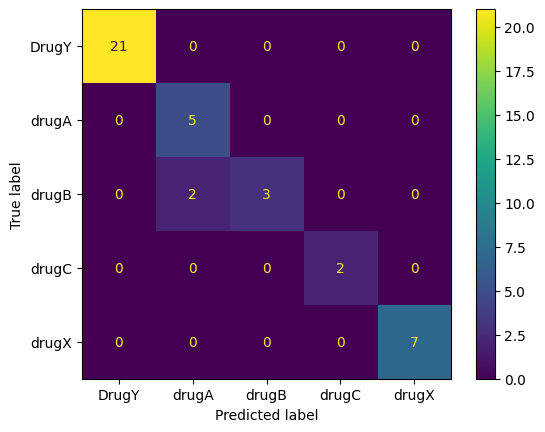

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [51]:
ypred_test = best_dtc.predict(xtest)
ypred_test[0:5]

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [52]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [53]:
yprob_test = best_dtc.predict_proba(xtest)
yprob_test[0:5]

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [54]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        21
       drugA       0.71      1.00      0.83         5
       drugB       1.00      0.60      0.75         5
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         7

    accuracy                           0.95        40
   macro avg       0.94      0.92      0.92        40
weighted avg       0.96      0.95      0.95        40



### Plot the Decision tree

In [56]:
# feature names
xtrain.columns

Index(['con__Age', 'con__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [57]:
# classes
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [59]:
ytrain.value_counts()

Drug 
DrugY    70
drugX    47
drugA    18
drugC    14
drugB    11
Name: count, dtype: int64

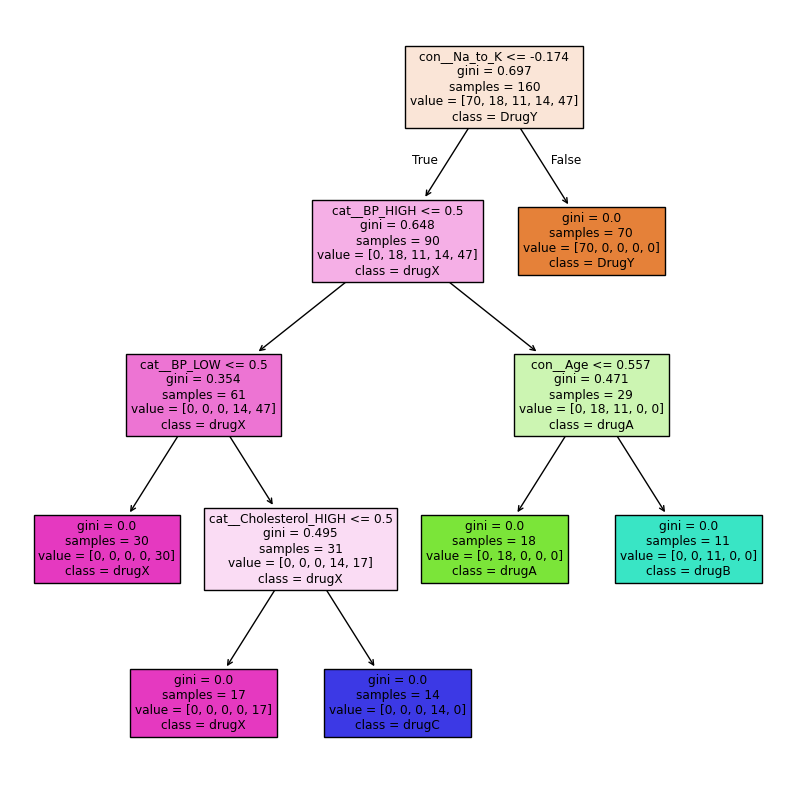

In [62]:
plt.figure(figsize = (10, 10))
plot_tree(best_dtc, feature_names=xtrain.columns, class_names=best_dtc.classes_, filled=True)
plt.show()

### Featuer Importance - this is applicable only to tree based model

In [63]:
best_dtc.feature_importances_

array([0.1223993 , 0.47712418, 0.        , 0.        , 0.20709818,
       0.05574393, 0.        , 0.13763441, 0.        ])

In [64]:
xtrain.columns

Index(['con__Age', 'con__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [66]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

con__Age                   0.122399
con__Na_to_K               0.477124
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_HIGH               0.207098
cat__BP_LOW                0.055744
cat__BP_NORMAL             0.000000
cat__Cholesterol_HIGH      0.137634
cat__Cholesterol_NORMAL    0.000000
dtype: float64